<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#TSNE-(dynamic)" data-toc-modified-id="TSNE-(dynamic)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>TSNE (dynamic)</a></span></li><li><span><a href="#Functional-PCA" data-toc-modified-id="Functional-PCA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functional PCA</a></span></li></ul></div>

In [15]:
import pandas as pd
import matplotlib.pylab as plt

from sklearn.manifold import TSNE
import pandas as pd
import seaborn as sns

from matplotlib.pyplot import cm
import matplotlib.pyplot as plt

import Parameters as prms
import numpy as np
import imageio

from fdasrsf import fPCA, time_warping, fdawarp, fdahpca


In [16]:
def process_summary_dict(ITMblood0_list, project_dir):
    sum_dict = {}
    for ITM in ITMblood0_list:
#         with (open(project_dir + str(ITM) + '.pickle', "rb")) as openfile:
#             print (ITM)
#             sum_dict[ITM] = pickle.load(openfile)
        sum_dict[ITM] = pd.read_pickle(project_dir + str(ITM) + '.pickle')
    return sum_dict    

In [17]:
def trim_points(dic, min_cut, max_cut = 5760, n=1):
    dic_trim = {}
    for key in dic.keys():
        df = dic[key]
        df = df[df.index % n == 0]
        df_trim = df[(df['Time']>=min_cut) & (df['Time']<=max_cut)]
        dic_trim[key] = df_trim
    return dic_trim

In [18]:
def extract_cells_from_summary(summary_dic, immune_cells, ITMblood0_list):
    cells_dic = {}
    for immune_cell in immune_cells:
        dic = {}
        for ITMs in ITMblood0_list:
            df = summary_dic[ITMs]
            dic[ITMs] = df[immune_cell].tolist()
        cells_dic[immune_cell] = pd.DataFrame(dic)
    return cells_dic

In [19]:
ITMblood0_list = [
    0, 1e1, 5e1, 1e2, 5e2, 1e3, 5e3, 1e4, 5e4, 1e5, 1e5, 1e6, 1e6, 1e7, 5e7,
    1e8, 1.25e8, 1.5e8, 1.75e8, 2e8, 2.25e8, 2.5e8, 2.75e8, 3e8, 3.25e8, 3.5e8,
    3.75e8, 4e8, 4.25e8, 4.5e8, 4.75e8, 5e8, 5.25e8, 5.5e8, 5.75e8, 6e8,
    6.25e8, 6.5e8, 6.75e8, 7e8, 7.25e8, 7.5e8, 7.75e8, 8e8, 8.25e8, 8.5e8,
    8.75e8, 9e8, 9.25e8, 9.5e8, 9.75e8, 1e9
]

project_dir = "./result/timeseries/"

summary_dic = process_summary_dict(ITMblood0_list, project_dir)
summary_trim_dic = trim_points(summary_dic, min_cut=2 * 24 * 60, n=40)

In [20]:
immune_cells = ['ITMtissue', 'ACH', 'CH', 'ND_A', 'ND_N', 'AP_Etissue']
cells_dic = extract_cells_from_summary(summary_trim_dic, immune_cells, ITMblood0_list)

In [21]:
ITMblood0_list_trim = [0, 1e8, 1.5e8,
                       2e8, 2.5e8, 
                       3e8, 3.5e8, 
                       4e8, 4.5e8, 
                       5e8,  5.5e8,
                       6e8, 6.5e8, 
                       7e8, 7.5e8, 
                       8e8, 8.5e8, 
                       9e8, 9.5e8, 
                       1e9]


ITMblood0_list_trim_label = ['0', '1e8', '1.5e8',
                       '2e8', '2.5e8', 
                       '3e8', '3.5e8', 
                       '4e8', '4.5e8', 
                       '5e8',  '5.5e8',
                       '6e8', '6.5e8', 
                       '7e8', '7.5e8', 
                       '8e8', '8.5e8', 
                       '9e8', '9.5e8', 
                       '1e9']

immune = ['N_R', 'AP_Eblood', 'AP_Etissue',
        'ITMtissue', 'M_R', 'M_A', 'CH', 'N_A',
       'ND_A', 'ACH', 'ND_N']


# TSNE (dynamic)

In [ ]:
cells_dic['ITMtissue']

In [ ]:


def do_tsne(ITM, i, ax, c, immune, ITM_label):
    X = summary_dic[ITM][immune].T
    y = immune[:]
    #     x = StandardScaler().fit_transform(x) # normalizing the features
    #     pca_immune = PCA(n_components=1)
    #     principalComponents_immune = pca_immune.fit_transform(x)

    # We want to get TSNE embedding with 2 dimensions
    n_components = 2
    tsne = TSNE(n_components)
    tsne_result = tsne.fit_transform(X)
    tsne_result.shape
    # (1000, 2)
    # Two dimensions for each of our images

    # Plot the result of our TSNE with the label color coded
    # A lot of the stuff here is about making the plot look pretty and not TSNE
    tsne_result_df = pd.DataFrame({
        'tsne_1': tsne_result[:, 0],
        'tsne_2': tsne_result[:, 1],
        'label': y
    })
    sns.scatterplot(x='tsne_1',
                    y='tsne_2',
                    hue='label',
                    data=tsne_result_df,
                    ax=ax,
                    s=120).set(title='ITMs: '+ ITM_label)


#     lim = (tsne_result.min()-5, tsne_result.max()+5)

In [ ]:
# ITMblood0_list_trim = [0]

t = [prms._stoptime * float(i) / (prms._numpoints - 1) for i in range(prms._numpoints)]
div = 2
color=iter(cm.plasma(np.linspace(0.2,1,int(len(ITMblood0_list_trim)/div)+1)))

pca_dic = {}


images=[]

for i in range(len(ITMblood0_list_trim)):
    if i%div==0:
        fig, ax = plt.subplots(1)
        ITM = ITMblood0_list_trim[i]
        c=next(color)
        do_tsne(ITM, i, ax, c, immune, ITMblood0_list_trim_label[i])
        ax.set_xlim((-500, 500))
        ax.set_ylim((-500, 500))
        ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
        plt.tight_layout()
        fig.savefig('result/plots/tsne/' + ITMblood0_list_trim_label[i] + '.png', bbox_inches='tight')

        # Used to return the plot as an image rray
        fig.canvas.draw()       # draw the canvas, cache the renderers
        
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        images.append(image)
imageio.mimsave('tsne.gif', images, fps=1)

# Functional PCA

In [9]:
len(immune)

11

Processing 0...
500
Initializing...
Compute Karcher Mean of 11 function in SRSF space...
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
updating step: r=6
updating step: r=7
updating step: r=8
updating step: r=9
updating step: r=10
updating step: r=11
updating step: r=12
updating step: r=13
updating step: r=14
updating step: r=15
updating step: r=16
updating step: r=17
updating step: r=18
updating step: r=19
updating step: r=20
maximal number of iterations is reached


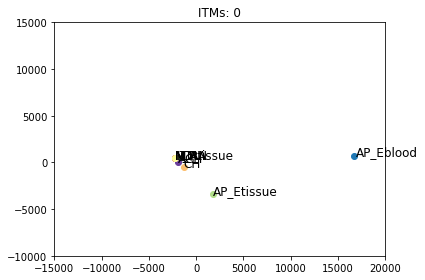

Processing 100000000.0...
500
Initializing...
Compute Karcher Mean of 11 function in SRSF space...
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
updating step: r=6
updating step: r=7
updating step: r=8
updating step: r=9
updating step: r=10
updating step: r=11
updating step: r=12
updating step: r=13
updating step: r=14
updating step: r=15
updating step: r=16
updating step: r=17
updating step: r=18
updating step: r=19
updating step: r=20
maximal number of iterations is reached


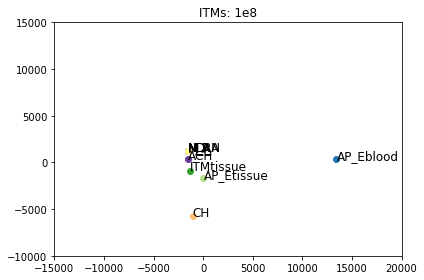

Processing 150000000.0...
500
Initializing...
Compute Karcher Mean of 11 function in SRSF space...
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
updating step: r=6
updating step: r=7
updating step: r=8
updating step: r=9
updating step: r=10
updating step: r=11
updating step: r=12
updating step: r=13
updating step: r=14
updating step: r=15
updating step: r=16
updating step: r=17
updating step: r=18
updating step: r=19
updating step: r=20
maximal number of iterations is reached


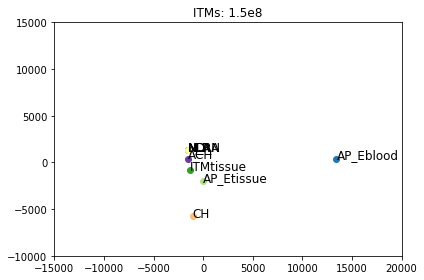

Processing 200000000.0...
500
Initializing...
Compute Karcher Mean of 11 function in SRSF space...
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
updating step: r=6
updating step: r=7
updating step: r=8
updating step: r=9
updating step: r=10
updating step: r=11
updating step: r=12
updating step: r=13
updating step: r=14
updating step: r=15
updating step: r=16
updating step: r=17
updating step: r=18
updating step: r=19
updating step: r=20
maximal number of iterations is reached


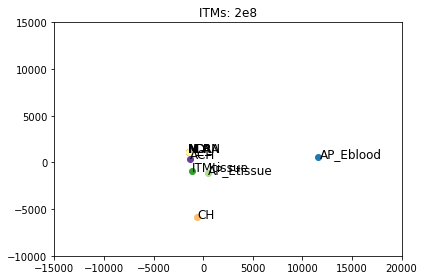

Processing 250000000.0...
500
Initializing...
Compute Karcher Mean of 11 function in SRSF space...
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
updating step: r=6
updating step: r=7
updating step: r=8
updating step: r=9
updating step: r=10
updating step: r=11
updating step: r=12
updating step: r=13
updating step: r=14
updating step: r=15
updating step: r=16
updating step: r=17
updating step: r=18
updating step: r=19
updating step: r=20
maximal number of iterations is reached


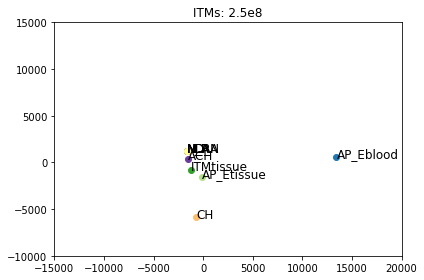

Processing 300000000.0...
500
Initializing...
Compute Karcher Mean of 11 function in SRSF space...
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
updating step: r=6
updating step: r=7
updating step: r=8
updating step: r=9
updating step: r=10
updating step: r=11
updating step: r=12
updating step: r=13
updating step: r=14
updating step: r=15
updating step: r=16
updating step: r=17
updating step: r=18
updating step: r=19
updating step: r=20
maximal number of iterations is reached


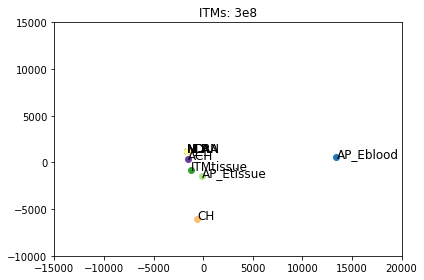

Processing 350000000.0...
500
Initializing...
Compute Karcher Mean of 11 function in SRSF space...
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
updating step: r=6
updating step: r=7
updating step: r=8
updating step: r=9
updating step: r=10
updating step: r=11
updating step: r=12
updating step: r=13
updating step: r=14
updating step: r=15
updating step: r=16
updating step: r=17
updating step: r=18
updating step: r=19
updating step: r=20
maximal number of iterations is reached


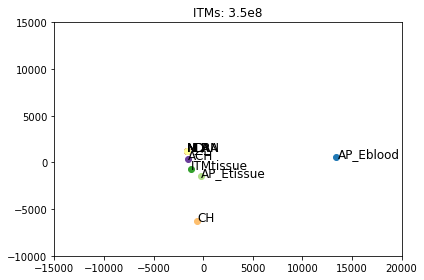

Processing 400000000.0...
500
Initializing...
Compute Karcher Mean of 11 function in SRSF space...
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
updating step: r=6
updating step: r=7
updating step: r=8
updating step: r=9
updating step: r=10
updating step: r=11
updating step: r=12
updating step: r=13
updating step: r=14
updating step: r=15
updating step: r=16
updating step: r=17
updating step: r=18
updating step: r=19
updating step: r=20
maximal number of iterations is reached


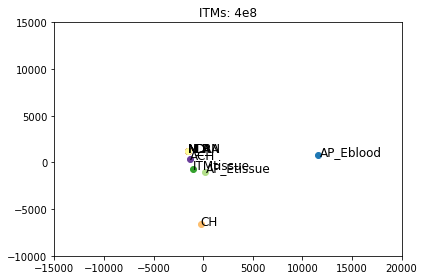

Processing 450000000.0...
500
Initializing...
Compute Karcher Mean of 11 function in SRSF space...
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
updating step: r=6
updating step: r=7
updating step: r=8
updating step: r=9
updating step: r=10
updating step: r=11
updating step: r=12
updating step: r=13
updating step: r=14
updating step: r=15
updating step: r=16
updating step: r=17
updating step: r=18
updating step: r=19
updating step: r=20
maximal number of iterations is reached


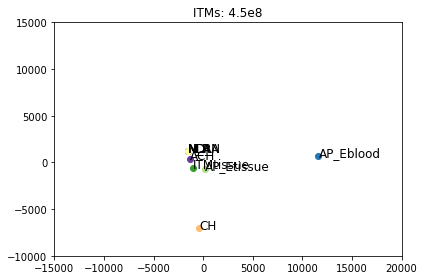

Processing 500000000.0...
500
Initializing...
Compute Karcher Mean of 11 function in SRSF space...
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
updating step: r=6
updating step: r=7
updating step: r=8
updating step: r=9
updating step: r=10
updating step: r=11
updating step: r=12
updating step: r=13
updating step: r=14
updating step: r=15
updating step: r=16
updating step: r=17
updating step: r=18
updating step: r=19
updating step: r=20
maximal number of iterations is reached


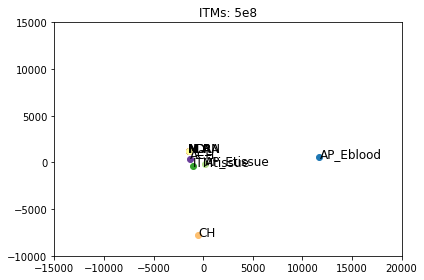

Processing 550000000.0...
500
Initializing...
Compute Karcher Mean of 11 function in SRSF space...
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
updating step: r=6
updating step: r=7
updating step: r=8
updating step: r=9
updating step: r=10
updating step: r=11
updating step: r=12
updating step: r=13
updating step: r=14
updating step: r=15
updating step: r=16
updating step: r=17
updating step: r=18
updating step: r=19
updating step: r=20
maximal number of iterations is reached


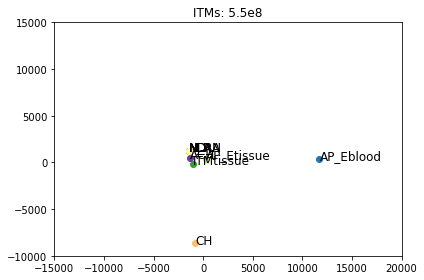

Processing 600000000.0...
500
Initializing...
Compute Karcher Mean of 11 function in SRSF space...
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
updating step: r=6
updating step: r=7
updating step: r=8
updating step: r=9
updating step: r=10
updating step: r=11
updating step: r=12
updating step: r=13
updating step: r=14
updating step: r=15
updating step: r=16
updating step: r=17
updating step: r=18
updating step: r=19
updating step: r=20
maximal number of iterations is reached


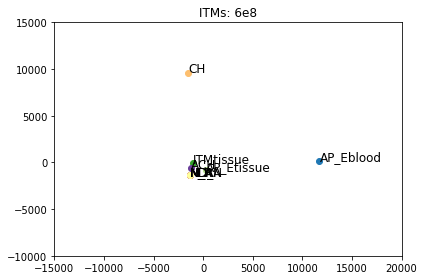

Processing 650000000.0...
500
Initializing...
Compute Karcher Mean of 11 function in SRSF space...
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
updating step: r=6
updating step: r=7
updating step: r=8
updating step: r=9
updating step: r=10
updating step: r=11
updating step: r=12
updating step: r=13
updating step: r=14
updating step: r=15
updating step: r=16
updating step: r=17
updating step: r=18
updating step: r=19
updating step: r=20
maximal number of iterations is reached


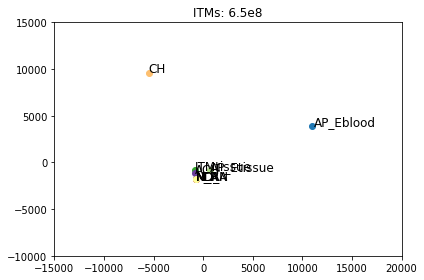

Processing 700000000.0...
500
Initializing...
Compute Karcher Mean of 11 function in SRSF space...
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
updating step: r=6
updating step: r=7
updating step: r=8
updating step: r=9
updating step: r=10
updating step: r=11
updating step: r=12
updating step: r=13
updating step: r=14
updating step: r=15
updating step: r=16
updating step: r=17
updating step: r=18
updating step: r=19
updating step: r=20
maximal number of iterations is reached


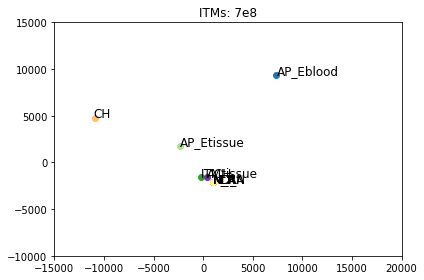

Processing 750000000.0...
500
Initializing...
Compute Karcher Mean of 11 function in SRSF space...
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
updating step: r=6
updating step: r=7
updating step: r=8
updating step: r=9
updating step: r=10
updating step: r=11
updating step: r=12
updating step: r=13
updating step: r=14
updating step: r=15
updating step: r=16
updating step: r=17
updating step: r=18
updating step: r=19
updating step: r=20
maximal number of iterations is reached


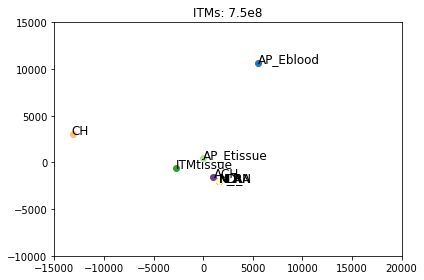

Processing 800000000.0...
500
Initializing...
Compute Karcher Mean of 11 function in SRSF space...
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
updating step: r=6
updating step: r=7
updating step: r=8
updating step: r=9
updating step: r=10
updating step: r=11
updating step: r=12
updating step: r=13
updating step: r=14
updating step: r=15
updating step: r=16
updating step: r=17
updating step: r=18
updating step: r=19
updating step: r=20
maximal number of iterations is reached


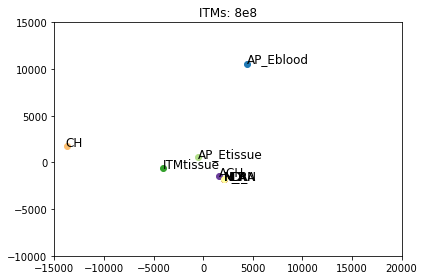

Processing 850000000.0...
500
Initializing...
Compute Karcher Mean of 11 function in SRSF space...
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
updating step: r=6
updating step: r=7
updating step: r=8
updating step: r=9
updating step: r=10
updating step: r=11
updating step: r=12
updating step: r=13
updating step: r=14
updating step: r=15
updating step: r=16
updating step: r=17
updating step: r=18
updating step: r=19
updating step: r=20
maximal number of iterations is reached


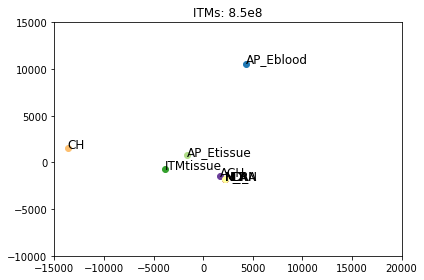

Processing 900000000.0...
500
Initializing...
Compute Karcher Mean of 11 function in SRSF space...
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
updating step: r=6
updating step: r=7
updating step: r=8
updating step: r=9
updating step: r=10
updating step: r=11
updating step: r=12
updating step: r=13
updating step: r=14
updating step: r=15
updating step: r=16
updating step: r=17
updating step: r=18
updating step: r=19
updating step: r=20
maximal number of iterations is reached


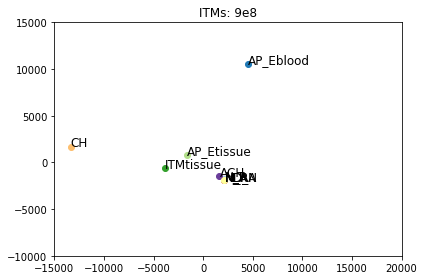

Processing 950000000.0...
500
Initializing...
Compute Karcher Mean of 11 function in SRSF space...
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
updating step: r=6
updating step: r=7
updating step: r=8
updating step: r=9
updating step: r=10
updating step: r=11
updating step: r=12
updating step: r=13
updating step: r=14
updating step: r=15
updating step: r=16
updating step: r=17
updating step: r=18
updating step: r=19
updating step: r=20
maximal number of iterations is reached


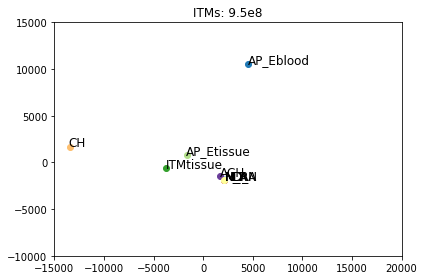

Processing 1000000000.0...
500
Initializing...
Compute Karcher Mean of 11 function in SRSF space...
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
updating step: r=6
updating step: r=7
updating step: r=8
updating step: r=9
updating step: r=10
updating step: r=11
updating step: r=12
updating step: r=13
updating step: r=14
updating step: r=15
updating step: r=16
updating step: r=17
updating step: r=18
updating step: r=19
updating step: r=20
maximal number of iterations is reached


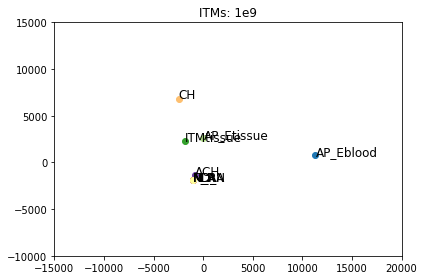

In [30]:
# Pivot table to get "Date" as index and regions as columns
# df = df.pivot(index='Date', columns='Region', values='Temp')
images=[]
for i in range(len(ITMblood0_list_trim)):
    fig, ax = plt.subplots()
    ITM = ITMblood0_list_trim[i]
    print(f"Processing {ITM}...")

    df = summary_dic[ITM]
    df_trim = df[(df.index + 1) % 20 == 0]
    print(len(df_trim))
    df_immune = df_trim[immune]
    time = df_trim['Time'].to_numpy()

    f_trim = df_immune.to_numpy().astype(float)

    # Functional Alignment
    # Align time-series
    warp_f = time_warping.fdawarp(f_trim, time)
    warp_f.srsf_align()
    #     warp_f.plot()

    # Functional Principal Components Analysis

    # Define the FPCA as a vertical analysis
    fPCA_analysis = fPCA.fdavpca(warp_f)

    # Run the FPCA on a 3 components basis
    fPCA_analysis.calc_fpca(no=3)
    #     fPCA_analysis.plot()
    fPCA_coef = fPCA_analysis.coef

    colors = [
        '#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c',
        '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99'
    ]
    
    for j in range(len(fPCA_coef)):
        x = fPCA_coef[j, 0]
        y = fPCA_coef[j, 1]
        ax.plot(x, y, 'bo', color = colors[j])
#         if i == len(ITMblood0_list_trim)-1:
        ax.text(x * (1 + 0.01), y * (1 + 0.01), immune[j], fontsize=12)
#         ax.set_xlimit()
        ax.set_xlim((-15000, 20000))
        ax.set_ylim((-10000, 15000))
    fig.savefig('result/plots/fpca/' + ITMblood0_list_trim_label[i] +'.png', bbox_inches='tight')
    plt.title('ITMs: '+ ITMblood0_list_trim_label[i])
    plt.tight_layout()
    fig.canvas.draw()       # draw the canvas, cache the renderers
    
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    images.append(image)
    plt.show()
imageio.mimsave('result/plots/fpca.gif', images, fps=1)
    


In [23]:
# Pivot table to get "Date" as index and regions as columns 
# df = df.pivot(index='Date', columns='Region', values='Temp')

for i in range(len(ITMblood0_list_trim)):
    ITM = ITMblood0_list_trim[i]
    print (f"Processing {ITM}...")
    
    df = summary_dic[ITM]
    df_trim = df[immune]
    df_trim

    f = df_trim.to_numpy().astype(float)
    f_trim = f[0:400]
    time = np.linspace(0,1,len(f_trim))
    
    
    # Functional Alignment
    # Align time-series
    warp_f = time_warping.fdawarp(f_trim, time)
    warp_f.srsf_align()

#     warp_f.plot()
    
    
    # Functional Principal Components Analysis

    # Define the FPCA as a vertical analysis
    fPCA_analysis = fPCA.fdavpca(warp_f)

    # Run the FPCA on a 3 components basis 
    fPCA_analysis.calc_fpca(no=3)
#     fPCA_analysis.plot()


    # Plot of the 3 functions
    fig = go.Figure()

    # Add traces
    fig.add_trace(go.Scatter(y=fPCA_analysis.f_pca[:,0,0], mode='lines', name="PC1"))
    fig.add_trace(go.Scatter(y=fPCA_analysis.f_pca[:,0,1], mode='lines', name="PC2"))
    fig.add_trace(go.Scatter(y=fPCA_analysis.f_pca[:,0,2], mode='lines', name="PC3"))

    fig.update_layout(
        title_text='<b>Principal Components Analysis Functions</b>', title_x=0.5,
    )

    fig.show()

    # Coefficients of PCs against regions
    fPCA_coef = fPCA_analysis.coef

    # Plot of PCs against regions
    fig = go.Figure(data=go.Scatter(x=fPCA_coef[:,0], y=fPCA_coef[:,1], mode='markers+text', text=df.columns))

    fig.update_traces(textposition='top center')

    fig.update_layout(
        autosize=False,
        width=800,
        height=700,
        title_text='<b>Function Principal Components Analysis on Immune System</b>', title_x=0.5,
        xaxis_title="PC1",
        yaxis_title="PC2",
    )
    fig.show()

Processing 0...
Initializing...
Compute Karcher Mean of 11 function in SRSF space...
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
updating step: r=6
updating step: r=7
updating step: r=8
updating step: r=9
updating step: r=10
updating step: r=11
updating step: r=12
updating step: r=13
updating step: r=14
updating step: r=15
updating step: r=16
updating step: r=17
updating step: r=18
updating step: r=19
updating step: r=20
maximal number of iterations is reached


NameError: name 'go' is not defined

In [ ]:
time = np.linspace(0,1,len(f_trim))
len(time)

In [ ]:
from fdasrsf import fPCA, time_warping, fdawarp, fdahpca

# Functional Alignment
# Align time-series
warp_f = time_warping.fdawarp(f_trim, time)
warp_f.srsf_align()

warp_f.plot()

In [ ]:
# Functional Principal Components Analysis

# Define the FPCA as a vertical analysis
fPCA_analysis = fPCA.fdavpca(warp_f)

# Run the FPCA on a 3 components basis 
fPCA_analysis.calc_fpca(no=3)
fPCA_analysis.plot()

import plotly.graph_objects as go

# Plot of the 3 functions
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(y=fPCA_analysis.f_pca[:,0,0], mode='lines', name="PC1"))
fig.add_trace(go.Scatter(y=fPCA_analysis.f_pca[:,0,1], mode='lines', name="PC2"))
fig.add_trace(go.Scatter(y=fPCA_analysis.f_pca[:,0,2], mode='lines', name="PC3"))

fig.update_layout(
    title_text='<b>Principal Components Analysis Functions</b>', title_x=0.5,
)

fig.show()

# Coefficients of PCs against regions
fPCA_coef = fPCA_analysis.coef

# Plot of PCs against regions
fig = go.Figure(data=go.Scatter(x=fPCA_coef[:,0], y=fPCA_coef[:,1], mode='markers+text', text=df.columns))

fig.update_traces(textposition='top center')

fig.update_layout(
    autosize=False,
    width=800,
    height=700,
    title_text='<b>Function Principal Components Analysis on Immune System</b>', title_x=0.5,
    xaxis_title="PC1",
    yaxis_title="PC2",
)
fig.show()